In [1]:
import pandas as pd
ks2018 = pd.read_csv("ks-projects-201801.csv")
ks2018= ks2018.drop(['ID', 'name', 'category', "goal", "pledged"], axis=1)
display(ks2018[:20])


,main_category,currency,deadline,launched,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.00,0.00,1533.95
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,100.00,2421.00,30000.00
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.00,220.00,45000.00
3,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.00,1.00,5000.00
4,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.00,1283.00,19500.00
5,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.00,52375.00,50000.00
6,Food,USD,2014-12-21,2014-12-01 18:30:44,successful,16,US,1205.00,1205.00,1000.00
7,Food,USD,2016-03-17,2016-02-01 20:05:12,failed,40,US,453.00,453.00,25000.00
8,Design,USD,2014-05-29,2014-04-24 18:14:43,canceled,58,US,8233.00,8233.00,125000.00
9,Film & Video,USD,2014-08-10,2014-07-11 21:55:48,canceled,43,US,6240.57,6240.57,65000.00


#preprocessing

In [2]:
ks2018['deadline'] = pd.to_datetime(ks2018['deadline'])
ks2018['launched'] = pd.to_datetime(ks2018['launched'])
ks2018.dtypes
ks2018['deadline_launched'] = ks2018['deadline'] - ks2018['launched']
ks2018['deadline_launched']= ks2018["deadline_launched"].dt.days

In [3]:
ks2018= ks2018.drop(['launched', 'deadline', "usd_pledged_real"], axis=1)
ks2018 =ks2018[ks2018.state != "live"]
ks2018 =ks2018[ks2018.state != "undefined"]
ks2018 =ks2018[ks2018.state != "suspended"]

In [4]:
cleanup_nums = {"state":     {'canceled':1, 'failed':2, 'successful':3}}
ks2018.replace(cleanup_nums, inplace=True)

In [5]:
cleanup_nums = {"main_category":     {'Art':1, 'Comics':2, 'Crafts':3, 'Dance':4, 'Design':5, 'Fashion':6, 
                                      'Film & Video':7,'Food':8, 'Games':9, 'Journalism':10, 'Music':11, 
                                      'Photography':12, 'Publishing':13,'Technology':14, 'Theater':15}}
ks2018.replace(cleanup_nums, inplace=True)

In [6]:
cleanup_nums = {"currency":     {'AUD':1, 'CAD':2, 'CHF':3, 'DKK':4, 'EUR':5, 'GBP':6, 'HKD':7, 'JPY':8, 'MXN':9,
                                 'NOK':10, 'NZD':11, 'SEK':12, 'SGD':13, 'USD':14}}
ks2018.replace(cleanup_nums, inplace=True)

In [7]:
cleanup_nums = {"country":     {'AT':1, 'AU':2, 'BE':3, 'CA':4, 'CH':5, 'DE':6, 'DK':7, 'ES':8, 'FR':9, 'GB':10, 
                                'HK':11,'IE':12, 'IT':13, 'JP':14, 'LU':15, 'MX':16, 'N,0"':17, 'NL':18, 'NO':19, 
                                'NZ':20,'SE':21, 'SG':22, 'US':23}}
ks2018.replace(cleanup_nums, inplace=True)

In [8]:
print(ks2018.groupby(["state"]).count())
print(ks2018['state'].unique())

       main_category  currency  backers  country  usd pledged  usd_goal_real  \
state                                                                          
1              38779     38779    38779    38779        38757          38779   
2             197719    197719   197719   197719       197614         197719   
3             133956    133956   133956   133956       133851         133956   

       deadline_launched  
state                     
1                  38779  
2                 197719  
3                 133956  
[2 1 3]


In [9]:
import keras
keras.__version__


Using TensorFlow backend.


'2.2.4'

In [10]:
pd.set_option('float_format', '{:f}'.format)
ks2018[["usd pledged", "usd_goal_real", "deadline_launched"]].describe().loc[['mean', "std", "min", "max"]]

,usd pledged,usd_goal_real,deadline_launched
mean,7076.437966,45076.376313,33.406512
std,78822.582579,1128264.968841,60.689139
min,0.000000,0.010000,0.000000
max,20338986.270000,166361390.710000,14866.000000


In [11]:
## x en y split met nummers niet one hot
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np
import numpy
# Inputs
X = numpy.array(ks2018.loc[:, ks2018.columns != 'state'], dtype='int64')
y = numpy.array(ks2018['state'].values, dtype='int64')
class_weights = class_weight.compute_class_weight('balanced',
                                                 numpy.unique(y),
                                                 y)
print(class_weights)
print(np.unique(y))

[3.18431797 0.62454628 0.92183005]
[1 2 3]


In [12]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '2': {} ".format(sum(y==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y==3)))

sm = SMOTE(random_state=4)
X_res, y_res = sm.fit_sample(X, y.ravel())

print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_res==2)))
print("After OverSampling, counts of label '2': {}".format(sum(y_res==3)))

X = X_res
y = y_res

Before OverSampling, counts of label '1': 38779
Before OverSampling, counts of label '2': 197719 
Before OverSampling, counts of label '3': 133956 

After OverSampling, the shape of X: (593157, 7)
After OverSampling, the shape of y: (593157,) 

After OverSampling, counts of label '1': 197719
After OverSampling, counts of label '2': 197719
After OverSampling, counts of label '2': 197719


In [13]:
from keras.utils import to_categorical
# one hot encoder
from sklearn.preprocessing import LabelBinarizer
onehot = LabelBinarizer()
y = onehot.fit_transform(y)

print(y)


[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [14]:
######  feature scaling robust
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
print(type(X))
X = scaler.fit_transform(X)
print(X.shape)

<class 'numpy.ndarray'>
(593157, 7)


In [15]:
## split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=999)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(395438, 7)
(395438, 3)
(197719, 7)
(197719, 3)


#setting up Confusion matrix


In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = ['canceled', 'successful', 'failed']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test_non_category, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax.grid(False)


np.set_printoptions(precision=2)


Automatically created module for IPython interactive environment


#knn


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8478421396021627
0.7442178040552502


In [0]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test, sample_weight=None))
y_test_non_category = [ np.argmax(t) for t in y_test]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]
cm = confusion_matrix(y_test_non_category, y_predict_non_category)

0.7442178040552502


Confusion matrix:
 [[44942 18517  2385]
 [21507 41949  2850]
 [ 2704  1802 61063]]



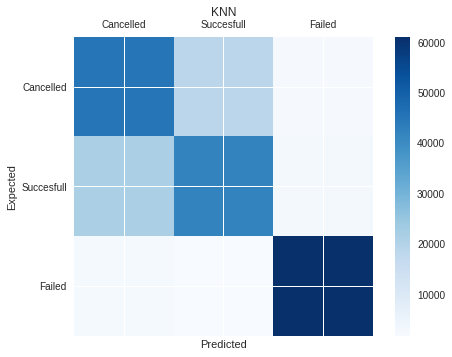

In [0]:
import matplotlib.pyplot as plt
print('Confusion matrix:\n', cm)
print()
labels = ['Cancelled', 'Succesfull', 'Failed']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title("KNN")
plt.show()


In [0]:
y_test_non_category = [ np.argmax(t) for t in y_test]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]


In [0]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_non_category, y_predict_non_category, classes=class_names, normalize=False,
                      title='kNN')

plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_non_category, y_predict_non_category, target_names=['Canceled', 'Succesfull', 'Failed']))

              precision    recall  f1-score   support

    Canceled       0.65      0.68      0.67     65844
  Succesfull       0.67      0.63      0.65     66306
      Failed       0.92      0.93      0.93     65569

   micro avg       0.75      0.75      0.75    197719
   macro avg       0.75      0.75      0.75    197719
weighted avg       0.75      0.75      0.75    197719



#MLP


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
	# create model
model = Sequential()
model.add(Dense(34, input_dim=7, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(3, activation='softmax'))
keras.optimizers.Adam(lr=0.0001, beta_1=0.0, beta_2=0.0, epsilon=None, amsgrad=False)

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)]  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=29, 
                    verbose=1, callbacks=callbacks_list)

print(history.history.keys())

Instructions for updating:
Use tf.cast instead.
Train on 316350 samples, validate on 79088 samples
Epoch 1/200
316350/316350 [==============================] - 33s 104us/step - loss: 0.5920 - acc: 0.6809 - val_loss: 0.5556 - val_acc: 0.7030
Epoch 2/200
316350/316350 [==============================] - 31s 98us/step - loss: 0.5381 - acc: 0.7110 - val_loss: 0.5434 - val_acc: 0.7110
Epoch 3/200
316350/316350 [==============================] - 31s 98us/step - loss: 0.5229 - acc: 0.7228 - val_loss: 0.5095 - val_acc: 0.7308
Epoch 4/200
316350/316350 [==============================] - 31s 98us/step - loss: 0.5122 - acc: 0.7297 - val_loss: 0.5047 - val_acc: 0.7393
Epoch 5/200
316350/316350 [==============================] - 31s 99us/step - loss: 0.5070 - acc: 0.7349 - val_loss: 0.5121 - val_acc: 0.7336
Epoch 6/200
316350/316350 [==============================] - 32s 102us/step - loss: 0.5026 - acc: 0.7384 - val_loss: 0.4940 - val_acc: 0.7411
Epoch 7/200
316350/316350 [==========================

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 34)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 300)               10500     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 453       
Total params: 56,375
Trainable params: 56,375
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test, verbose=1)
y = to_categorical(y_pred)
print(accuracy_score(y, y_test))

197719/197719 [==============================] - 6s 29us/step
0.7570036263586201


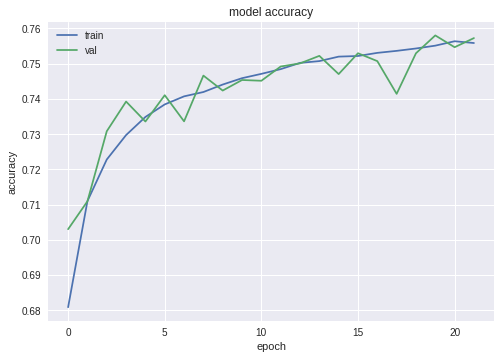

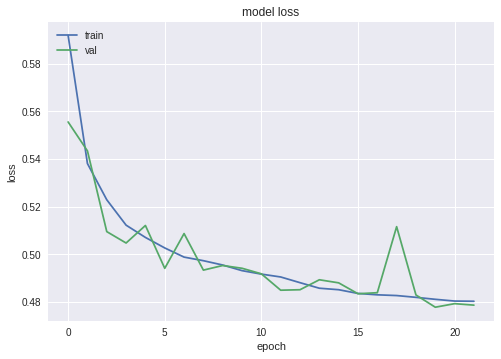

In [0]:

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix:
 [[40074 23579  2191]
 [18375 46210  1721]
 [  785  1394 63390]]



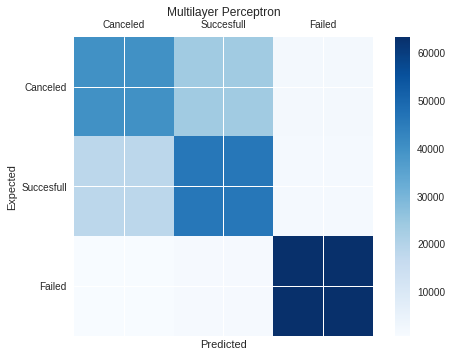

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

y_test_non_category = [ np.argmax(t) for t in y_test]
y_predict_non_category = [ np.argmax(t) for t in y ]

#print(y_test_non_category)
#print(y_predict_non_category)
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
#print(conf_mat)

#conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print()
labels = ['Canceled', 'Succesfull', 'Failed']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title("Multilayer Perceptron")
plt.show()


Confusion matrix, without normalization
[[40074 23579  2191]
 [18375 46210  1721]
 [  785  1394 63390]]


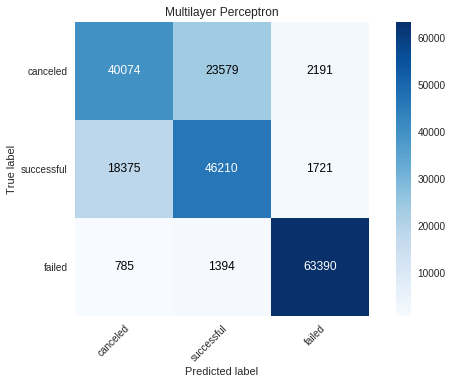

In [0]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_non_category, y_predict_non_category, classes=class_names, normalize=False,
                      title='Multilayer Perceptron')

plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_non_category, y_predict_non_category, target_names=['Canceled', 'Succesfull', 'Failed']))

              precision    recall  f1-score   support

    Canceled       0.68      0.61      0.64     65844
  Succesfull       0.65      0.70      0.67     66306
      Failed       0.94      0.97      0.95     65569

   micro avg       0.76      0.76      0.76    197719
   macro avg       0.76      0.76      0.76    197719
weighted avg       0.76      0.76      0.76    197719



#prep for conv and lstm



2    197719
3    133956
1     38779
Name: state, dtype: int64


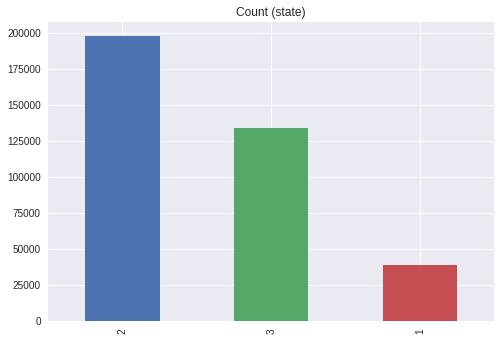

In [0]:
import pandas as pd

state_count = ks2018.state.value_counts()
print(state_count[0:3])
# Divide by class
df_class_1 = ks2018[ks2018['state'] == 1]
df_class_2 =  ks2018[ks2018['state'] == 2]  #{'canceled':1, 'failed':2, 'successful':3}
df_class_3 =  ks2018[ks2018['state'] == 3]#failed

#print('Proportion:', round(state_count[0] / state_count[1], 3), ': 1')
state_count.plot(kind='bar', title='Count (state)');

In [0]:
## x en y split met nummers niet one hot
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np
import numpy

# Inputs
X = numpy.array(ks2018.loc[:, ks2018.columns != 'state'], dtype='int64')
y = numpy.array(ks2018['state'].values, dtype='int64')
class_weights = class_weight.compute_class_weight('balanced',
                                                 numpy.unique(y),
                                                 y)

print(class_weights)
print(numpy.unique(y))

[3.18431797 0.62454628 0.92183005]
[1 2 3]


In [0]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '2': {} ".format(sum(y==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y==3)))

sm = SMOTE(random_state=4)
X_res, y_res = sm.fit_sample(X, y.ravel())

print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_res==2)))
print("After OverSampling, counts of label '2': {}".format(sum(y_res==3)))

X= numpy.array(X_res)
y= numpy.array(y_res)


Before OverSampling, counts of label '1': 38779
Before OverSampling, counts of label '2': 197719 
Before OverSampling, counts of label '3': 133956 

After OverSampling, the shape of X: (593157, 7)
After OverSampling, the shape of y: (593157,) 

After OverSampling, counts of label '1': 197719
After OverSampling, counts of label '2': 197719
After OverSampling, counts of label '2': 197719


In [0]:
from keras.utils import to_categorical
# one hot encoder
from sklearn.preprocessing import LabelBinarizer
onehot = LabelBinarizer()
y = onehot.fit_transform(y)

print(y)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [0]:
######  feature scaling robust
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
print(type(X))
X = scaler.fit_transform(X)
print(X.shape)

<class 'numpy.ndarray'>
(593157, 7)


In [0]:
## split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=63)
print(X_train.shape)
print(y_train)
print(X_test.shape)
print(y_test)
X_train = X_train.reshape(X_train.shape[0], 1, 7)
X_test = X_test.reshape(X_test.shape[0], 7, 1)

(395438, 7)
[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
(197719, 7)
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 0 1]]


#lstm


In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

data_dim = 1
timesteps =  7


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))# returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(3, activation='softmax'))

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)]

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=200, epochs=50,
          validation_split=0.2, 
          callbacks=callbacks_list)

Train on 316350 samples, validate on 79088 samples
Epoch 1/50
316350/316350 [==============================] - 49s 156us/step - loss: 0.6768 - acc: 0.6397 - val_loss: 0.5596 - val_acc: 0.6921
Epoch 2/50
316350/316350 [==============================] - 44s 138us/step - loss: 0.5514 - acc: 0.6930 - val_loss: 0.5331 - val_acc: 0.7051
Epoch 3/50
316350/316350 [==============================] - 44s 139us/step - loss: 0.5353 - acc: 0.7037 - val_loss: 0.5246 - val_acc: 0.7086
Epoch 4/50
316350/316350 [==============================] - 44s 139us/step - loss: 0.5260 - acc: 0.7109 - val_loss: 0.5260 - val_acc: 0.7116
Epoch 5/50
316350/316350 [==============================] - 44s 138us/step - loss: 0.5196 - acc: 0.7178 - val_loss: 0.5103 - val_acc: 0.7233
Epoch 6/50
316350/316350 [==============================] - 43s 137us/step - loss: 0.5145 - acc: 0.7221 - val_loss: 0.5055 - val_acc: 0.7281
Epoch 7/50
316350/316350 [==============================] - 42s 134us/step - loss: 0.5088 - acc: 0.7271

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 527250, 32)        5120      
_________________________________________________________________
lstm_23 (LSTM)               (None, 527250, 32)        8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 527250, 32)        0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_58 (Dense)             (None, 3)                 99        
Total params: 21,859
Trainable params: 21,859
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_test, verbose=1)

print(y_test)
y = to_categorical(y_pred)
print(accuracy_score(y, y_test))


197719/197719 [==============================] - 20s 103us/step
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 0 1]]
0.7628907692229882


Confusion matrix:
 [[45578 18174  1868]
 [23251 41487  1335]
 [  952  1301 63773]]



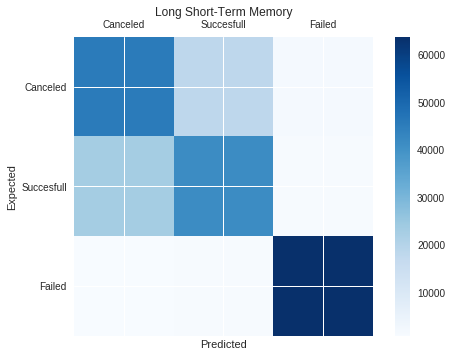

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

y_test_non_category = [ np.argmax(t) for t in y_test]
y_predict_non_category = [ np.argmax(t) for t in y ]

#print(y_test_non_category)
#print(y_predict_non_category)
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
#print(conf_mat)

#conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print()
labels = ['Canceled', 'Succesfull', 'Failed']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title("Long Short-Term Memory")
plt.show()

In [0]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_non_category, y_predict_non_category, classes=class_names, normalize=False,
                      title='Long Short-Term Memory')

plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_non_category, y_predict_non_category, target_names=['Canceled', 'Succesfull', 'Failed']))

              precision    recall  f1-score   support

    Canceled       0.65      0.69      0.67     65620
  Succesfull       0.68      0.63      0.65     66073
      Failed       0.95      0.97      0.96     66026

   micro avg       0.76      0.76      0.76    197719
   macro avg       0.76      0.76      0.76    197719
weighted avg       0.76      0.76      0.76    197719



#CONVNET

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import Reshape, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Dropout, GaussianNoise, LSTM

model_m = Sequential()
model_m.add(Conv1D(200, 5, activation='relu', input_shape=(7, 1))) #200 in begin 0.7522342314092222 mooi resultaat 0.752557923113105
model_m.add(Conv1D(200, 1, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(260, 1, activation='relu')) 
model_m.add(Conv1D(260, 1, activation='relu'))
model_m.add(GlobalAveragePooling1D())

model_m.add(Dropout(0.1))

model_m.add(Dense(3, activation='softmax'))

#keras.optimizers.Adam(lr=0.1,  # vandert voorheen 0.01
 #                     beta_1=0.9, # 0.9 0.834012228205855
  #                    beta_2=0.9, # 0,5 0.8294610681459287 meer stappen
  #                    epsilon=None, 
  #                    decay=0.0, 
   #                   amsgrad=False) 

print(model_m.summary())  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3, 200)            1200      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 200)            40200     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 200)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 260)            52260     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 260)            67860     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 260)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 260)               0         
__________

In [0]:
from sklearn.utils import class_weight
from keras import optimizers

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)]


model_m.compile(loss='categorical_crossentropy',
                optimizer="adam", metrics=['accuracy'])

BATCH_SIZE = 150
EPOCHS = 50

history = model_m.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1) #zo laten


Train on 316350 samples, validate on 79088 samples
Epoch 1/50
316350/316350 [==============================] - 52s 164us/step - loss: 0.6020 - acc: 0.6725 - val_loss: 0.5492 - val_acc: 0.7003
Epoch 2/50
316350/316350 [==============================] - 50s 158us/step - loss: 0.5505 - acc: 0.6989 - val_loss: 0.5444 - val_acc: 0.7078
Epoch 3/50
316350/316350 [==============================] - 51s 160us/step - loss: 0.5337 - acc: 0.7105 - val_loss: 0.5225 - val_acc: 0.7251
Epoch 4/50
316350/316350 [==============================] - 50s 159us/step - loss: 0.5216 - acc: 0.7209 - val_loss: 0.5106 - val_acc: 0.7300
Epoch 5/50
316350/316350 [==============================] - 50s 158us/step - loss: 0.5128 - acc: 0.7293 - val_loss: 0.5077 - val_acc: 0.7299
Epoch 6/50
316350/316350 [==============================] - 50s 158us/step - loss: 0.5058 - acc: 0.7357 - val_loss: 0.5031 - val_acc: 0.7373
Epoch 7/50
316350/316350 [==============================] - 50s 159us/step - loss: 0.5019 - acc: 0.7388

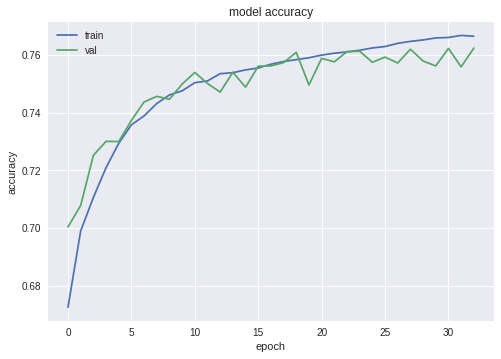

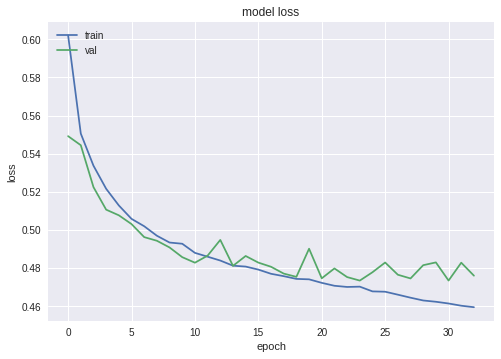

In [0]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import accuracy_score

y_pred = model_m.predict_classes(X_test, verbose=1)

print(y_test)
y = to_categorical(y_pred)
print(accuracy_score(y, y_test))

197719/197719 [==============================] - 9s 48us/step
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 0 1]]
0.7617932520395106


Confusion matrix:
 [[43463 20419  1738]
 [21027 43976  1070]
 [  841  2003 63182]]



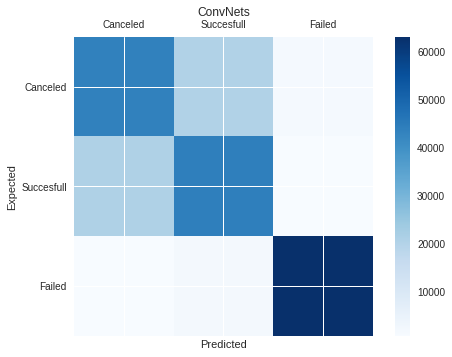

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

y_test_non_category = [ np.argmax(t) for t in y_test]
y_predict_non_category = [ np.argmax(t) for t in y ]

#print(y_test_non_category)
#print(y_predict_non_category)
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
#print(conf_mat)

#conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print()
labels = ['Canceled', 'Succesfull', 'Failed']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title("ConvNets")
plt.show()


In [0]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_non_category, y_predict_non_category, classes=class_names, normalize=False,
                      title='ConvNets')

plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_non_category, y_predict_non_category, target_names=['Canceled', 'Succesfull', 'Failed']))

              precision    recall  f1-score   support

    Canceled       0.67      0.66      0.66     65620
  Succesfull       0.66      0.67      0.66     66073
      Failed       0.96      0.96      0.96     66026

   micro avg       0.76      0.76      0.76    197719
   macro avg       0.76      0.76      0.76    197719
weighted avg       0.76      0.76      0.76    197719



#examples prediction of new data


In [0]:
Xnew =[[11,	14,	1.,	23,	1.00,		5000.00, 34],
      [8, 14,	16,	23,	1205.00,	1000.00,19],
      [9,	14,	0,	23,	0.00,	29000, 49],  
      [9,	6,	761,	10,	57763.78,	6469.73, 27], 
      [5,	6,	647,	23,	39693.00,		25000.00,	39], 
      [3,	4,	60,	7,	3059.73,	8442.45,	23]] 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

Xnew = np.asarray(Xnew)
print(Xnew.shape)
scaler = RobustScaler()
Xnew = scaler.fit_transform(Xnew)

Xnew = Xnew.reshape(6, 7, 1)
ynew = model_m.predict_classes(Xnew)
ycat = to_categorical(ynew, 3)


for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % ( i , ycat[i]))

(6, 7)
X=0, Predicted=[0. 1. 0.]
X=1, Predicted=[0. 1. 0.]
X=2, Predicted=[0. 1. 0.]
X=3, Predicted=[0. 1. 0.]
X=4, Predicted=[0. 1. 0.]
X=5, Predicted=[0. 0. 1.]
